In [1]:
# Import dependencies
import pandas as pd
import datetime as dt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and read data
file = "./Original Data/airline_passenger_satisfaction.csv"
df=pd.read_csv(file,parse_dates=True)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Exploratory Data Analysis

In [3]:
# See the shape of data
df.shape

(129880, 24)

In [4]:
# Check if there is any null values
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [5]:
# Find the percentage of missing value
393/129880

0.003025870033877425

Missing value comprise of 0.3% of the total data

In [6]:
# Use median method to fill missing values
df.fillna(df['Arrival Delay'].median(), inplace = True)

In [7]:
# Find the descriptive information of dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129880.0,15.045465,38.416353,0.0,0.00,0.0,13.00,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.00,3.0,4.00,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0


We can see that Age, Flight Distance, Departure Delay and Arrival Delay have high variance

In [8]:
# Find the summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

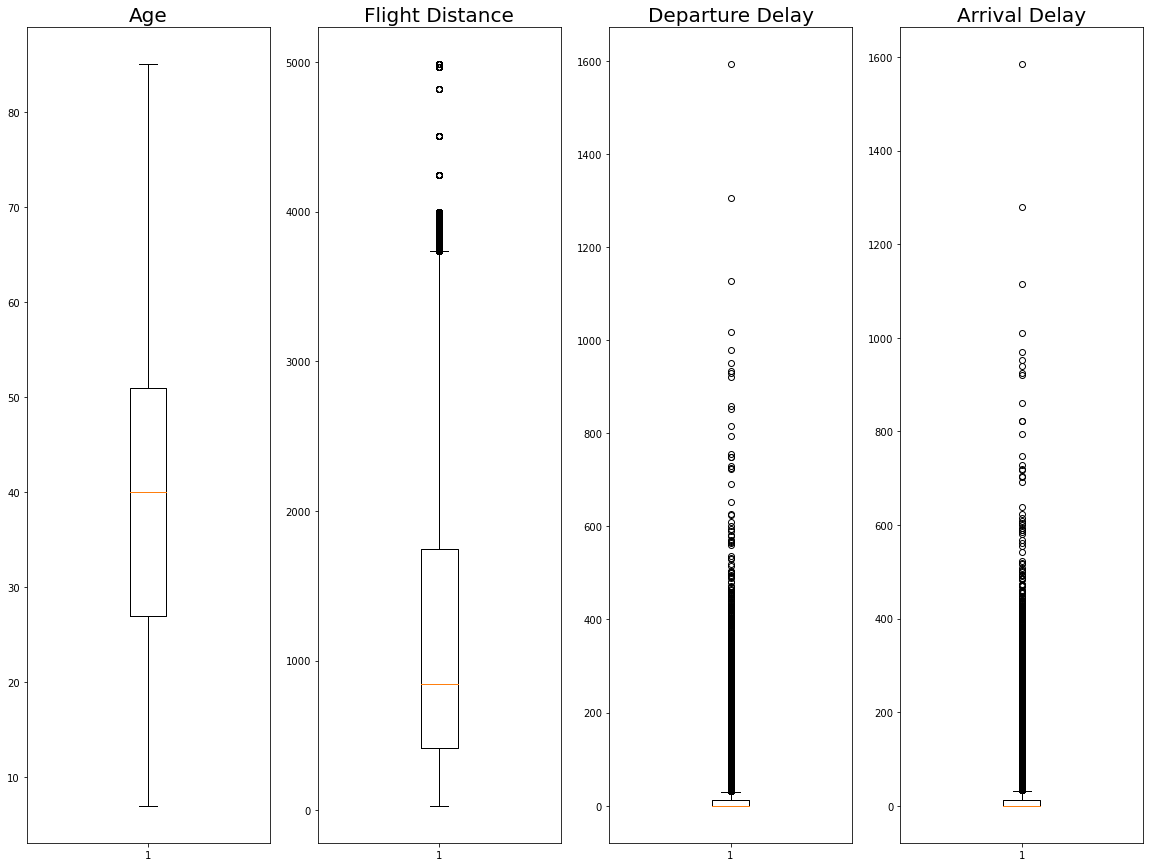

In [9]:
# Inspect Outliers
plt.figure(figsize=(20,15))
check_list=['Age','Flight Distance','Departure Delay','Arrival Delay']
for i in range(len(check_list)):
    plt.subplot(1, len(check_list), i+1) 
    plt.boxplot(df[check_list[i]]) 
    plt.title(check_list[i],fontsize=20)
    
plt.show()

We can see that Flight Distance, Departure Delay and Arrival Delay have some outliers

In [10]:
def copy_df(df):
    return df.copy()

In [11]:
# Remove the outliers 
def outliers(df, column):
    low = np.quantile(df[column], 0.05)
    high = np.quantile(df[column], 0.95)
    return df[df[column].between(low, high, inclusive = True)]


In [12]:
df = (df.pipe(copy_df).
              pipe(outliers, "Flight Distance").
              pipe(outliers, "Departure Delay").
              pipe(outliers, "Arrival Delay"))

/var/folders/qn/c0ll_4m107d0w2b21m8wkgz80000gn/T/ipykernel_4289/1100951050.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  return df[df[column].between(low, high, inclusive = True)]


In [13]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


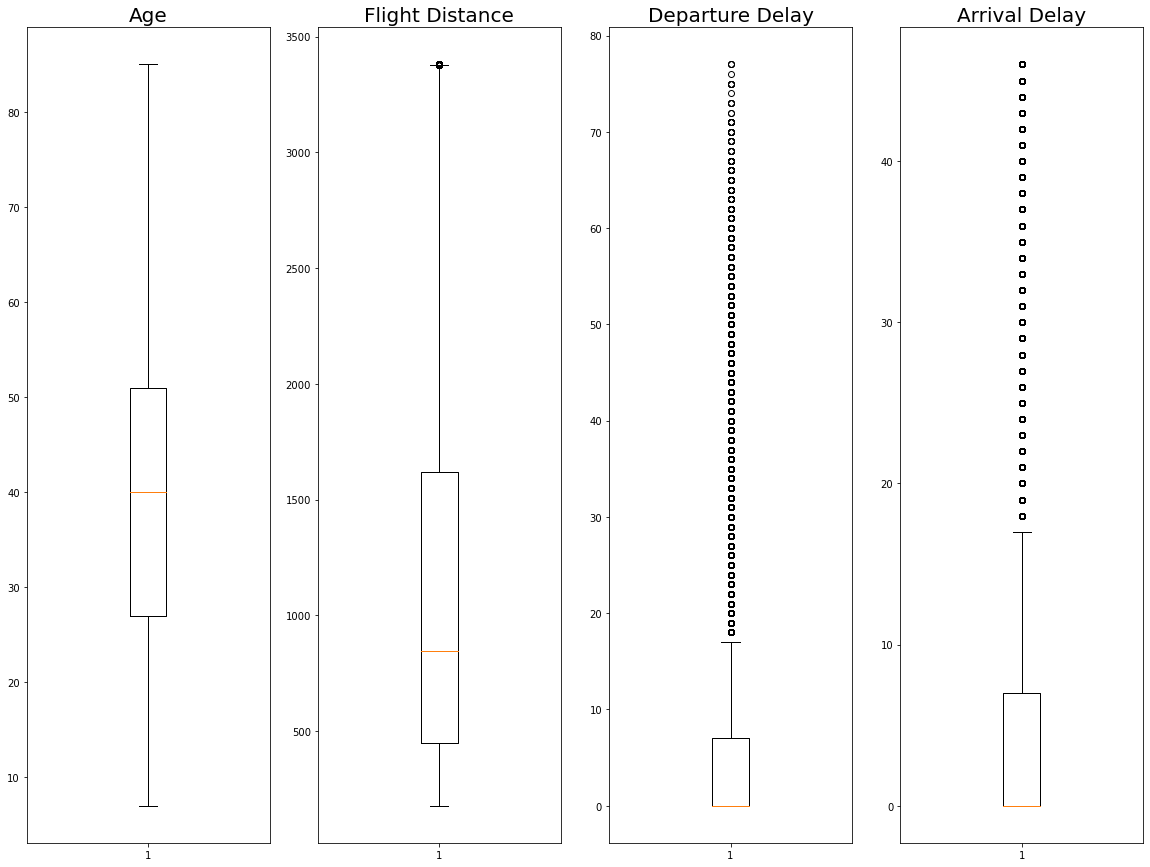

In [14]:
plt.figure(figsize=(20,15))
for i in range(len(check_list)):
    plt.subplot(1, len(check_list), i+1) 
    plt.boxplot(df[check_list[i]]) 
    plt.title(check_list[i],fontsize=20)
    
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105722 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      105722 non-null  int64  
 1   Gender                                  105722 non-null  object 
 2   Age                                     105722 non-null  int64  
 3   Customer Type                           105722 non-null  object 
 4   Type of Travel                          105722 non-null  object 
 5   Class                                   105722 non-null  object 
 6   Flight Distance                         105722 non-null  int64  
 7   Departure Delay                         105722 non-null  int64  
 8   Arrival Delay                           105722 non-null  float64
 9   Departure and Arrival Time Convenience  105722 non-null  int64  
 10  Ease of Online Booking                  1057

# Data Visualization

Satisfaction

In [24]:
df.Satisfaction.value_counts()

Neutral or Dissatisfied    60529
Satisfied                  45193
Name: Satisfaction, dtype: int64

In [23]:
df.Satisfaction.value_counts(normalize=True)

Neutral or Dissatisfied    0.57253
Satisfied                  0.42747
Name: Satisfaction, dtype: float64

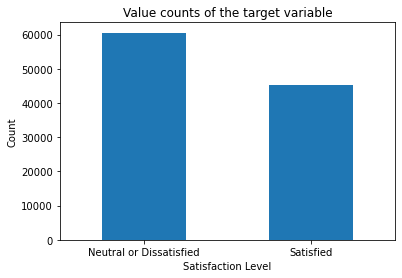

In [18]:
df.Satisfaction.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Satisfaction Level")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Type of Travel

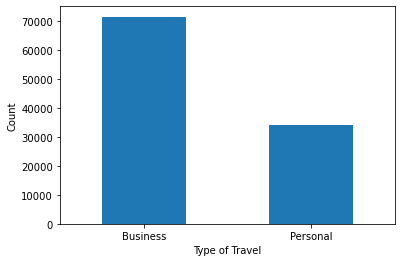

In [28]:
df["Type of Travel"].value_counts().plot(kind="bar")
plt.xlabel("Type of Travel")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Customer Type

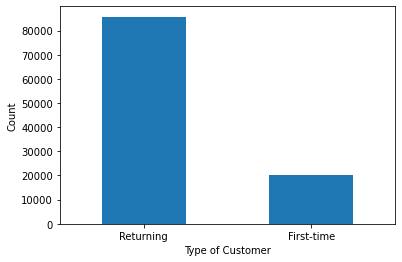

In [29]:
df["Customer Type"].value_counts().plot(kind="bar")
plt.xlabel("Type of Customer")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Age

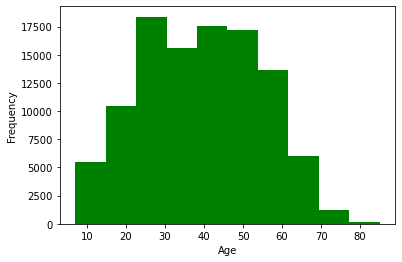

In [31]:
plt.hist(df["Age"],color="green")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Flight Distance

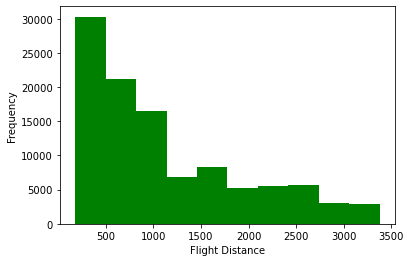

In [34]:
plt.hist(df["Flight Distance"],color="green")
plt.xlabel("Flight Distance")
plt.ylabel("Frequency")
plt.show() 

<AxesSubplot:>

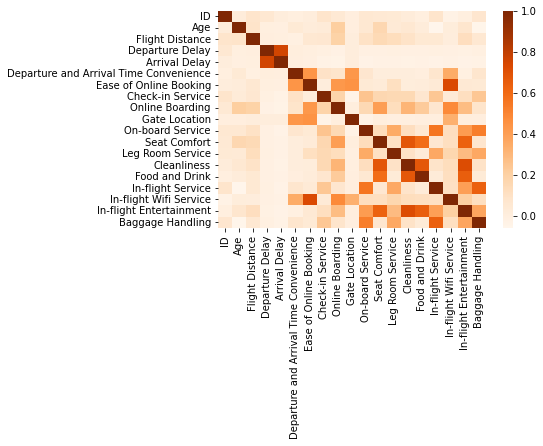

In [36]:
# Correlation among the variables
sns.heatmap(df.corr(), cmap="Oranges")